In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split #自动进行切割

path = r"Advertising.csv"
data = pd.read_csv(path)
data["TV"]

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
5        8.7
6       57.5
7      120.2
8        8.6
9      199.8
10      66.1
11     214.7
12      23.8
13      97.5
14     204.1
15     195.4
16      67.8
17     281.4
18      69.2
19     147.3
20     218.4
21     237.4
22      13.2
23     228.3
24      62.3
25     262.9
26     142.9
27     240.1
28     248.8
29      70.6
       ...  
170     50.0
171    164.5
172     19.6
173    168.4
174    222.4
175    276.9
176    248.4
177    170.2
178    276.7
179    165.6
180    156.6
181    218.5
182     56.2
183    287.6
184    253.8
185    205.0
186    139.5
187    191.1
188    286.0
189     18.7
190     39.5
191     75.5
192     17.2
193    166.8
194    149.7
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [15]:
data.shape
x = data[["TV", "radio", "newspaper"]]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [7]:
y = data["sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
5       7.2
6      11.8
7      13.2
8       4.8
9      10.6
10      8.6
11     17.4
12      9.2
13      9.7
14     19.0
15     22.4
16     12.5
17     24.4
18     11.3
19     14.6
20     18.0
21     12.5
22      5.6
23     15.5
24      9.7
25     12.0
26     15.0
27     15.9
28     18.9
29     10.5
       ... 
170     8.4
171    14.5
172     7.6
173    11.7
174    11.5
175    27.0
176    20.2
177    11.7
178    11.8
179    12.6
180    10.5
181    12.2
182     8.7
183    26.2
184    17.6
185    22.6
186    10.3
187    17.3
188    15.9
189     6.7
190    10.8
191     9.9
192     5.9
193    19.6
194    17.3
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

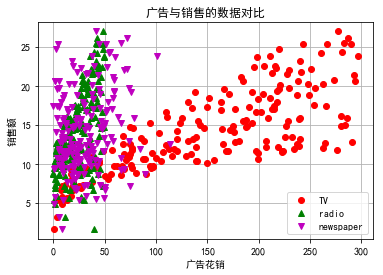

In [12]:
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False #解决中文乱码
plt.figure(facecolor="w")
plt.plot(data["TV"], y, "ro", label="TV") #ro表示用色点表示 r红色, o圆点
plt.plot(data["radio"], y, "g^", label="radio") #g代表绿色，^代表三角
plt.plot(data["newspaper"], y, "mv", label="newspaper") #g代表绿色，^代表三角
plt.xlabel("广告花销")
plt.ylabel("销售额")
plt.title("广告与销售的数据对比")
plt.grid()
plt.legend()
plt.show()

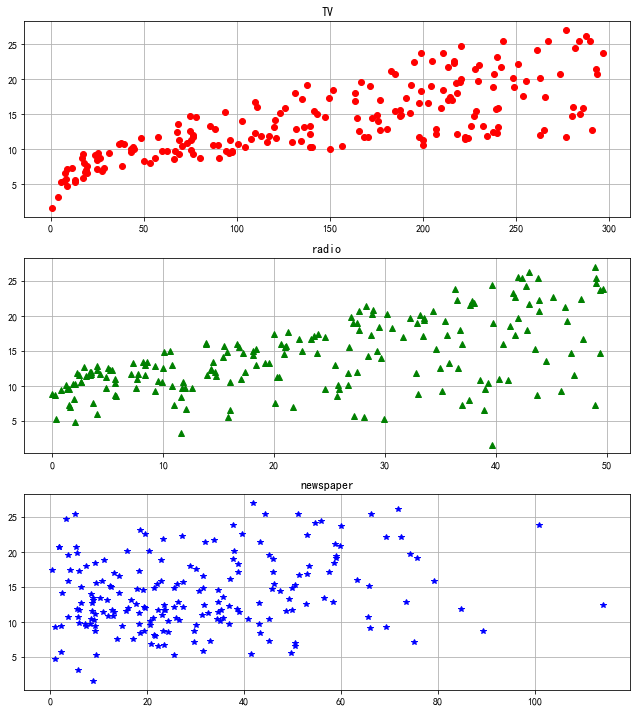

In [14]:
plt.figure(facecolor="w", figsize=(9,10))
plt.subplot(311)
plt.plot(data["TV"], y, "ro") #TV，表示红色的圆点
plt.title("TV")
plt.grid()
plt.subplot(312)
plt.plot(data["radio"], y, "g^") #radio，表示绿色的三角
plt.title("radio")
plt.grid()
plt.subplot(313)
plt.plot(data["newspaper"], y, "b*") #表示描绘黑色的*
plt.title("newspaper")
plt.grid()
plt.tight_layout()
plt.show()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

e:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(160, 3) (40, 3) (160,) (40,)


In [17]:
linreg = LinearRegression() #线性回归
model = linreg.fit(x_train, y_train) #训练数据返回一个模型
print(linreg.coef_, linreg.intercept_)

[0.0468431  0.17854434 0.00258619] 2.9079470208164295


In [18]:
order = y_test.argsort(axis=0) #有序排列
y_new = linreg.predict(x_test) #预测的数据
linreg.score(x_test, y_test) #评分

0.8927605914615385

In [25]:
order = y_test.argsort(axis=0) #按照参数排序
y_test = y_test.values[order] #只取一列
x_test = x_test.values[order, :] #取多列
y_hat = linreg.predict(x_test) #预测的数据
linreg.score(x_train, y_train)

0.8959372632325174

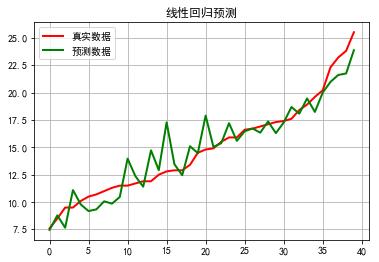

In [26]:
plt.figure(facecolor="w")
t = np.arange(len(x_test)) #生成数组
plt.plot(t, y_test, "r-", linewidth=2, label="真实数据")
plt.plot(t, y_hat, "g-", linewidth=2, label="预测数据")
plt.legend()
plt.title("线性回归预测")
plt.grid()
plt.show()

In [27]:
y_test

array([ 7.6,  8.5,  9.5,  9.5, 10.1, 10.5, 10.7, 11. , 11.3, 11.5, 11.5,
       11.7, 11.9, 11.9, 12.5, 12.8, 12.9, 12.9, 13.4, 14.5, 14.8, 14.9,
       15.5, 15.9, 15.9, 16.6, 16.7, 16.9, 17.1, 17.3, 17.4, 17.6, 18.4,
       18.9, 19.6, 20.2, 22.3, 23.2, 23.8, 25.5])

In [28]:
y_hat

array([ 7.45877832,  8.7842804 ,  7.65993185, 11.0944114 ,  9.78479388,
        9.177296  ,  9.33433055, 10.06809496,  9.85697601, 10.46670654,
       13.96678297, 12.36432281, 11.40303174, 14.71901407, 12.91345761,
       17.27925151, 13.45649226, 12.45188167, 15.09530285, 14.4677995 ,
       17.89202679, 15.03104665, 15.37556411, 17.1958903 , 15.58923732,
       16.45693776, 16.71866935, 16.33623628, 17.36056228, 16.29205532,
       17.26057027, 18.67730671, 18.06889853, 19.46028647, 18.22954934,
       19.98831261, 20.97197274, 21.60304218, 21.73577184, 23.86271904])